In [ ]:
# TBATS (Trigonometric, Box-Cox Transformation, ARMA Errors, Trend, and Seasonal Components)

In [4]:
# pip install pandas matplotlib tbats yfinance


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tbats import TBATS
import yfinance as yf


In [6]:
# Download Bitcoin data from Yahoo Finance
btc_data = yf.download('BTC-USD', start='2020-01-01', end='2024-01-01', interval='1d')

# Display the first few rows of the data
btc_data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


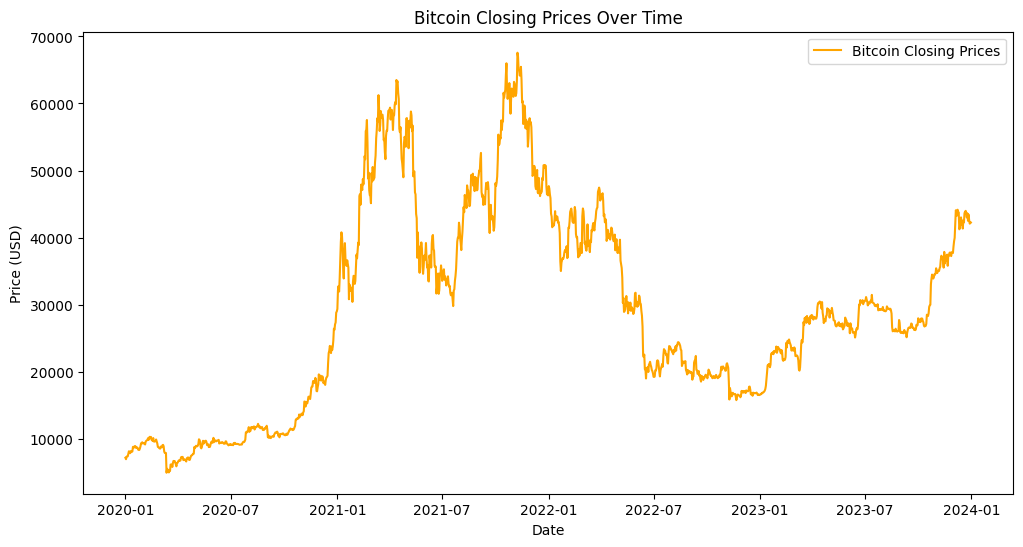

In [8]:
# Use the 'Close' price for analysis
btc_close = btc_data['Close'].dropna()

# Convert the index to datetime if it's not already
btc_close.index = pd.to_datetime(btc_close.index)

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(btc_close, label='Bitcoin Closing Prices', color='orange')
plt.title('Bitcoin Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [10]:
# Fit the TBATS model
tbats_model = TBATS(seasonal_periods=[7])  # weekly seasonality
tbats_fitted = tbats_model.fit(btc_close)

# Forecast the next 30 days
forecast = tbats_fitted.forecast(steps=30)

# Create a date range for the forecast
forecast_index = pd.date_range(start=btc_close.index[-1] + pd.Timedelta(days=1), periods=30)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecasted Price'])


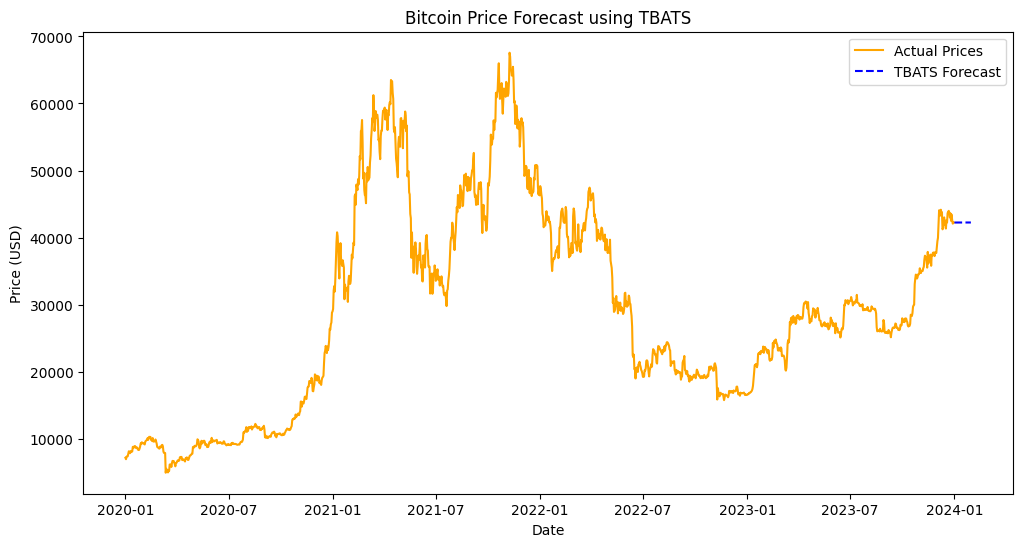

In [12]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(btc_close, label='Actual Prices', color='orange')
plt.plot(forecast_df, label='TBATS Forecast', color='blue', linestyle='--')
plt.title('Bitcoin Price Forecast using TBATS')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
